In [2]:

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import time

#NAME = "CatsVSDogsCNN64x2{}".format(int(time.time()))
#print(NAME)

tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))
#tensorboard --logdir=logs/ 

x=np.load('features.npy')
y=np.load('labels.npy')

x=x/255



In [3]:
print(len(x))

24946


In [5]:
dense_layers = [0,1,2]
layer_sizes = [32,64,128]
conv_layers = [1,2,3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))
            print(NAME)


            model = Sequential()

            model.add(Conv2D(layer_size, (3,3), input_shape = x.shape[1:]))
            model.add(Activation("relu"))
            model.add(MaxPooling2D(pool_size=(2,2)))
            
            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3,3)))
                model.add(Activation("relu"))
                model.add(MaxPooling2D(pool_size=(2,2)))

            model.add(Flatten())

            for l in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))
                #model.add(Dropout(0.2))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))

            # categorical works too
            model.compile(loss="binary_crossentropy", optimizer = "adam", metrics=['accuracy'])

            model.fit(x,y, batch_size=32, epochs=1, validation_split=0.3, callbacks= [tensorboard])



1-conv-32-nodes-0-dense-1608836906
546/546 [==============================] - 19s 34ms/step - loss: 0.6559 - accuracy: 0.6096 - val_loss: 0.5794 - val_accuracy: 0.7028
2-conv-32-nodes-0-dense-1608836925
546/546 [==============================] - 30s 53ms/step - loss: 0.6660 - accuracy: 0.5953 - val_loss: 0.6340 - val_accuracy: 0.6251
3-conv-32-nodes-0-dense-1608836954
546/546 [==============================] - 31s 56ms/step - loss: 0.6810 - accuracy: 0.5494 - val_loss: 0.6116 - val_accuracy: 0.6733
1-conv-64-nodes-0-dense-1608836987
546/546 [==============================] - 28s 51ms/step - loss: 0.6515 - accuracy: 0.6151 - val_loss: 0.5764 - val_accuracy: 0.7070
2-conv-64-nodes-0-dense-1608837016
546/546 [==============================] - 61s 110ms/step - loss: 0.6625 - accuracy: 0.5864 - val_loss: 0.5562 - val_accuracy: 0.7233
3-conv-64-nodes-0-dense-1608837076
546/546 [==============================] - 67s 121ms/step - loss: 0.6729 - accuracy: 0.5656 - val_loss: 0.6101 - val_accurac

In [106]:
val_loss, val_acc = model.evaluate(x,y)
print(val_loss, val_acc)

780/780 [==============================] - 16s 20ms/step - loss: 0.3519 - accuracy: 0.8469
0.35194477438926697 0.8469093441963196


In [108]:
#model.save('cat_dog_classifier.model')

INFO:tensorflow:Assets written to: cat_dog_classifier.model\assets


In [109]:
new_model = tf.keras.models.load_model('cat_dog_classifier.model')

predictions = new_model.predict([x])


In [155]:
i=9

In [156]:
print(predictions[i])

[0.91867155]


In [154]:
#import matplotlib.pyplot as plt
#import cv2

In [150]:
test = x[i]
test = cv2.resize(test, (50, 50))
print(test.shape)


(50, 50)


1


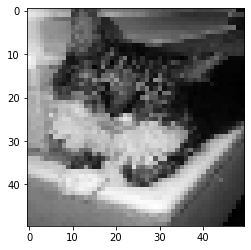

In [151]:
print(y[i])
plt.imshow(test, cmap = "gray")
plt.show()